# Day 15: Chiton

You've almost reached the exit of the cave, but the walls are getting closer together. Your submarine can barely still fit, though; the main problem is that the walls of the cave are covered in [chitons](https://en.wikipedia.org/wiki/Chiton), and it would be best not to bump any of them.

The cavern is large, but has a very low ceiling, restricting your motion to two dimensions. The shape of the cavern resembles a square; a quick scan of chiton density produces a map of **risk level** throughout the cave (your puzzle input). For example:

```
1163751742
1381373672
2136511328
3694931569
7463417111
1319128137
1359912421
3125421639
1293138521
2311944581
```

You start in the top left position, your destination is the bottom right position, and you cannot move diagonally. The number at each position is its **risk level**; to determine the total risk of an entire path, add up the risk levels of each position you **enter** (that is, don't count the risk level of your starting position unless you enter it; leaving it adds no risk to your total).

Your goal is to find a path with the **lowest total risk**. In this example, a path with the lowest total risk is highlighted here:

```
1163751742
1381373672
2136511328
3694931569
7463417111
1319128137
1359912421
3125421639
1293138521
2311944581
```

The total risk of this path is **`40`** (the starting position is never entered, so its risk is not counted).

## Part 1

**What is the lowest total risk of any path from the top left to the bottom right?**

In [23]:
with open('./input15.txt') as input_file:
    points = {(x, y): [int(risk_level), float('inf'), None] for y, line in enumerate(input_file.readlines()) for x, risk_level in enumerate(line.strip())}

def get_neighbours(x, y):
    return filter(lambda point: point in points, [(x-1, y), (x+1, y), (x, y-1), (x, y+1)])

points[0, 0] = (points[0, 0][0], 0, None)
target = (max(x for x, _ in points), max(y for _, y in points))

wait_list = [(0, 0)]
completed_points = []

while target not in completed_points:
    current_point = wait_list.pop(0)

    for neighbour in get_neighbours(*current_point):
        if neighbour not in completed_points:
            new_cost = points[current_point][1] + points[neighbour][0]

            if points[neighbour][1] > new_cost:
                points[neighbour][1] = new_cost
                points[neighbour][2] = current_point

            if neighbour not in wait_list:
                wait_list.append(neighbour)

    completed_points.append(current_point)

print(f'Lowest Risk Level: {points[target][1]}')

Lowest Risk Level: 435


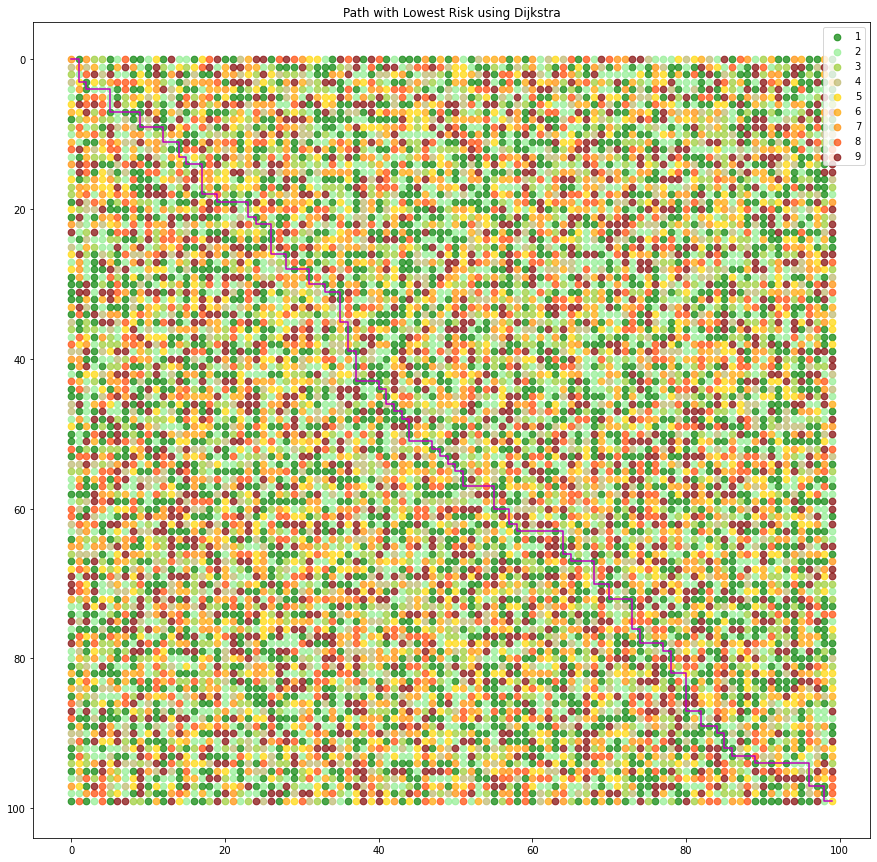

In [24]:
# the visualization

import matplotlib.pyplot as plt
import numpy as np

colors = {1: 'green', 2: 'lightgreen', 3: 'yellowgreen', 4: 'darkkhaki', 5: 'gold', 6: 'orange', 7: 'darkorange', 8: 'orangered', 9: 'maroon'}
x = np.array([point[0] for point in points])
y = np.array([point[1] for point in points])
x_path = []
y_path = []

pre_point = target
while pre_point != None:
    x_path.append(pre_point[0])
    y_path.append(pre_point[1])
    pre_point = points[pre_point][2]

plt.figure(figsize=(15, 15))
plt.gca().invert_yaxis()

risk_levels =[points[point][0] for point in points]
for level in np.unique(risk_levels):
    idx = np.where(risk_levels == level)
    plt.scatter(x[idx], y[idx], c = colors[level], label = level, s = 45, alpha=0.7)

if pre_point != target:
    plt.plot(x_path, y_path, 'm')

plt.title('Path with Lowest Risk using Dijkstra')
plt.legend()
plt.draw()